<a href="https://colab.research.google.com/github/qidopox/Polar_Walsh/blob/master/Walsh_Strehl_ratio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt



In [3]:
import numpy as np
import scipy.io
f = scipy.io.loadmat('Walsh_fluo_training.mat')
coeff = np.array(f['coeff'])
new_label = np.array(f['new_label'])
fluoint = np.array(f['fluoint'])

print(fluoint.shape,coeff.shape[1],new_label.shape[1])

inputs = tf.keras.Input(shape=(fluoint.shape[1],))
x = tf.keras.layers.Dense(64, activation=tf.nn.relu,kernel_initializer=tf.keras.initializers.GlorotUniform )(inputs)
x = tf.keras.layers.Dense(128, activation=tf.nn.relu,kernel_initializer=tf.keras.initializers.GlorotUniform )(x)
x = tf.keras.layers.Dense(64, activation=tf.nn.relu,kernel_initializer=tf.keras.initializers.GlorotUniform )(x)
x = tf.keras.layers.Dense(32, activation=tf.math.sigmoid,kernel_initializer=tf.keras.initializers.GlorotUniform )(x)


outputs = tf.keras.layers.Dense(new_label.shape[1], activation=tf.keras.activations.linear)(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)



(16384, 31) 15 15


Epoch 1/1000
32/32 [==============================] - 2s 3ms/step - loss: 0.9396
Epoch 2/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.8258
Epoch 3/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.8240
Epoch 4/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.8239
Epoch 5/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.8238
Epoch 6/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.8236
Epoch 7/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.8237
Epoch 8/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.8235
Epoch 9/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.8235
Epoch 10/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.8234
Epoch 11/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.8233
Epoch 12/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.8233
Epoch 13/1000
32/32 [====

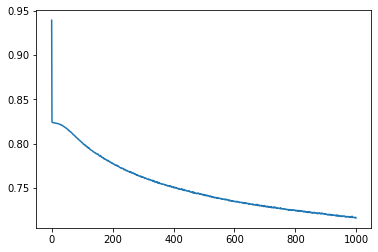

In [4]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.MeanSquaredError())
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
#               loss=tf.keras.losses.MeanSquaredLogarithmicError())

history = model.fit(fluoint,coeff,epochs=1000, steps_per_epoch=32)
# list all data in history
# print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.show()

In [7]:
import csv

with open('20220526_loss_0_1000_label_free_no_noise.csv','a+') as f:

  writer=csv.writer(f)

  writer.writerow(np.squeeze(history.history['loss']))

In [47]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.MeanSquaredError())
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
#               loss=tf.keras.losses.MeanSquaredLogarithmicError())
history = model.fit(fluoint,new_label,epochs=1000, steps_per_epoch=32)

# list all data in history
# print(history.history.keys())
# summarize history for accuracy
# plt.plot(history.history['loss'])
# plt.show()

Epoch 1/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.3370
Epoch 2/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.1618
Epoch 3/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.1565
Epoch 4/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.1525
Epoch 5/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.1456
Epoch 6/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.1374
Epoch 7/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.1291
Epoch 8/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.1207
Epoch 9/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.1138
Epoch 10/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.1073
Epoch 11/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.1013
Epoch 12/1000
32/32 [==============================] - 0s 2ms/step - loss: 0.0960
Epoch 13/1000
32/32 [====

In [8]:
model.save('model_260522_4by4_no_noise_label_free_64relu_128relu_64relu_32sigmoid.h5')

In [11]:
model2 = tf.keras.models.load_model("model_260522_4by4_no_noise_64relu_128relu_64relu_32sigmoid.h5")

In [12]:
i = 2
print('predict',model.predict(fluoint[i].reshape([1,-1])),'label',new_label[i],'coeff',coeff[i])

predict [[ 0.07172155 -0.5857311   0.49428666  0.17075147 -0.01741271  0.7937689
   0.11632769  0.09539454  0.5554078   0.19609118  0.02910866 -0.2366045
  -0.3173384   0.6185427  -0.28821236]] label [ 0.17871537 -0.13272189 -0.24507386 -0.33431872 -0.12069711  0.33798253
 -0.66926747  0.33986664  0.98096523 -0.26265949  0.04299554 -0.12820417
  0.01130816  0.14831073 -0.12743712] coeff [ 0.57141446 -1.31081913 -1.42317111  0.05838037 -1.29879435  0.73068161
 -0.27656839  0.73256572  1.37366432  0.13003959 -1.13510171  0.26449491
  0.40400724  0.54100982 -1.30553437]
